[View in Colaboratory](https://colab.research.google.com/github/maryn728/aiq-hackthon/blob/master/keras_mnist.ipynb)

# Keras

Keras is a **deep-learning framework** for Python that provides a** convenient way to define and**
**train** almost any kind of deep-learning model.

*   Same code can run seamlessly on **CPU** or **GPU**.
*  ** User-friendly API** for quickly prototyping deep-learning models
*   Built-in support for **convolutional networks** (for computer vision), **recurrent**
**networks** (for sequence processing), and why not both.
*   It supports** arbitrary network architectures**: multi-input or multi-output models,
layer sharing, model sharing, and so on


**Keras** is a model-level library, providing **high-level building blocks ** for developing
deep-learning models. It** doesn’t handle low-level operations** such as tensor manipulation
and differentiation.

The three existing backend implementations are the **TensorFlow** backend, the **Theano** backend, and the **Microsoft Cognitive Toolkit (CNTK)** backend.

---



![deep-learning software and hardware stack](https://xjgzgg.db.files.1drv.com/y4mczN9je-_l_9iyvOnD1luluRRwgriREPnCcJSbbv61ASBztV43qh1JcOg2uXBeGQkO30DHKWTTVUravQM18bKlR38Iq-pgvVEtCtnTXNFWCY0Az4HiT9pq0Svw7eKRAH4MnuZKSYpglAcdP_62bZOsl3Wqtic0SPjbWMUYo0Bc5J-JLvESBvjtg12w9kNgJWbtI-wv5JxTwskyCGsv3cYdw?width=360&height=186&cropmode=none)

The deep-learning software and hardware stack. Source: François Chollet, Deep Learning with Python

## What is MNIST?

MNIST dataset contains images of handwritten digits. It has **60,000 grayscale images** under the **training** set and **10,000 grayscale images** under the **test** set

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


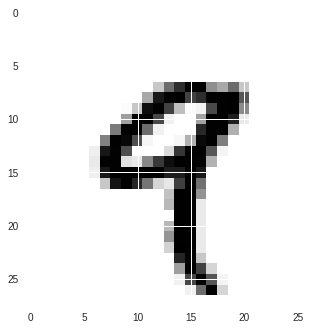

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

The **typical Keras workflow** has the following steps:

1.   Define your **training data**: input tensors and target tensors.
2.   Define a **network of layers** (or model) that maps your inputs to your targets.
3.   Configure the learning process by **choosing a loss function, an optimizer, and**
**some metrics to monitor**.
4.   Iterate on your training data by **calling the fit()** method of your model.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


The training images for instance were stored in an array of shape` (60000, 28, 28)` of type uint8 with values in the `[0, 255]` interval. We transform it into a float32 array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.2724 - acc: 0.9220
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1082 - acc: 0.9684
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0718 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0496 - acc: 0.9858
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0380 - acc: 0.9889


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 68us/step
test_acc: 0.9789


In [9]:
sample_image = test_images[0].reshape(1,28 * 28)
y_prob = model.predict(sample_image)[0]
y_pred = y_prob.argmax()
y_actual = test_labels[0].argmax()

print("probabilities: ", y_prob)
print("predicted = %d, actual = %d" % (y_pred, y_actual))

probabilities:  [2.4786220e-07 1.8203666e-08 3.0202020e-04 8.8411802e-04 2.2671200e-09
 3.7955857e-07 1.1797386e-09 9.9876010e-01 3.3412737e-06 4.9735740e-05]
predicted = 7, actual = 7


Check out the official [Keras Docs](https://keras.io/) for more details

For even more examples see [here](https://github.com/fchollet/deep-learning-with-python-notebooks) for more Keras examples - Deep Learning with Python code samples, as Jupyter notebooks

Some cool cheatsheets:


*   [Keras](http://datacamp-community.s3.amazonaws.com/94fc681d-5422-40cb-a129-2218e9522f17)
*   [Numpy](http://datacamp-community.s3.amazonaws.com/e9f83f72-a81b-42c7-af44-4e35b48b20b7)
*   [Scikit-Learn](http://datacamp-community.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116)
*   [Matplotlib](http://datacamp-community.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b)
*   [SciPy](http://datacamp-community.s3.amazonaws.com/5710caa7-94d4-4248-be94-d23dea9e668f)



